# Customer Segmentation Dataset

## By HImanshu Sharma (DSOCT03)

## Introduction
> Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

## Approach - Machine Learning
> Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.

> There are some analytics techniques that can help you with segmenting your customers. These are useful especially when you have a large number of customers and it’s hard to discover patterns in your customer data just by looking at transactions. The twocommon ones are:

> Clustering: Clustering is an exploration technique for datasets where relationships between different observations may be too hard to spot with the eye.

> In my code, I takes advantage of the Customer Segmentation Data to demonstrate the ability of K-Means clustering algorithm to identify customer's segments.

## Steps
- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Making Report on
    - Aboout data wrangling efforts and
    - About data analyses and visualizations

In [1]:
#import Useful Library
import pandas as pd
import numpy as np

#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.columns = ['id','gender','age','income','spending']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
id          200 non-null int64
gender      200 non-null object
age         200 non-null int64
income      200 non-null int64
spending    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,id,age,income,spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 1. Perform Basic EDA
### a. Boxplot

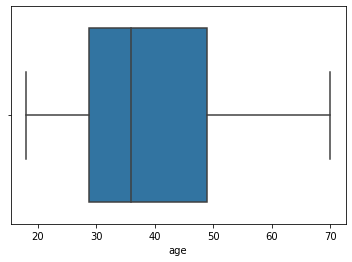

In [6]:
sns.boxplot(x="age", data=df)

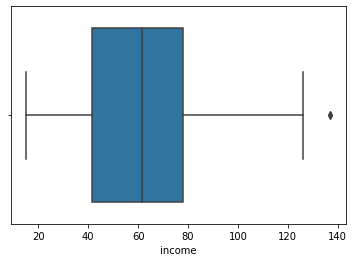

In [7]:
sns.boxplot(x="income", data=df)

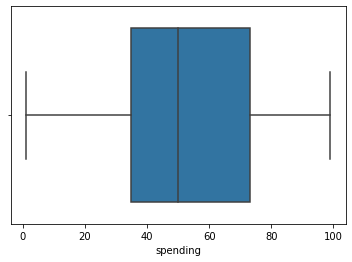

In [8]:
sns.boxplot(x="spending", data=df)

### b. Histogram – Distribution of Target Variable

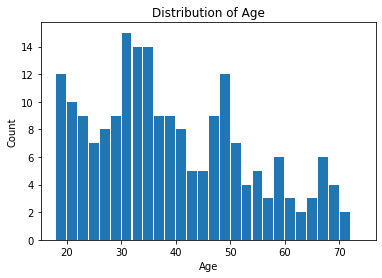

In [9]:
bins_size = np.arange(18,75,2)
plt.hist(x="age", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Age');
plt.ylabel('Count');
plt.xlabel('Age');

- By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

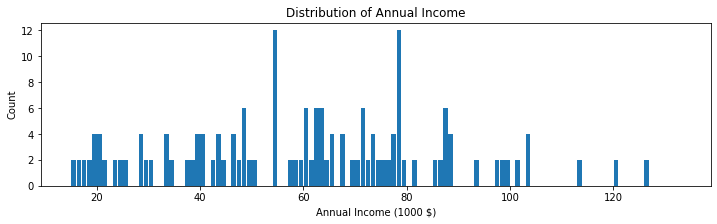

In [10]:
plt.figure(figsize=(12,3))
bins_size = np.arange(15,134,1)
plt.hist(x="income", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Annual Income');
plt.ylabel('Count');
plt.xlabel('Annual Income (1000 $)');

- This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15k US Dollars to 134K US Dollars. There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78k US Dollars.

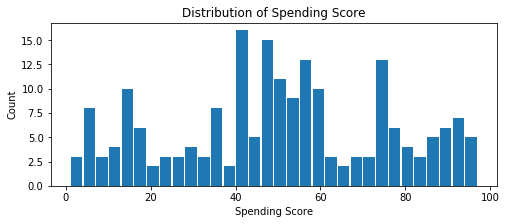

In [11]:
plt.figure(figsize=(8,3))
bins_size = np.arange(1,100,3)
plt.hist(x="spending", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Spending Score');
plt.ylabel('Count');
plt.xlabel('Spending Score');

we can conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having 1 spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

### c. Distribution Plot – Target Variable

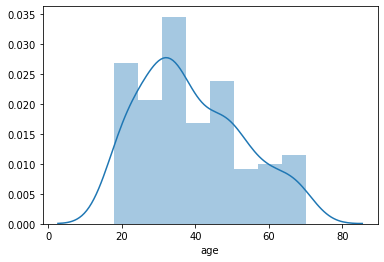

In [12]:
sns.distplot(df.age);

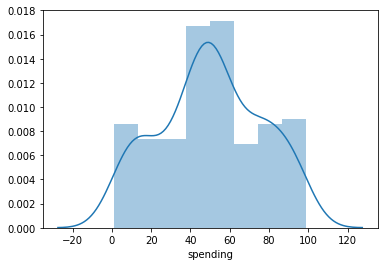

In [13]:
sns.distplot(df.spending);

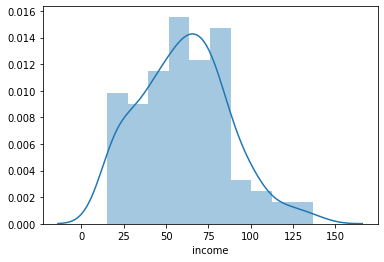

In [14]:
sns.distplot(df.income);

### d. Aggregation for all numerical Columns

In [15]:
df.describe()

,id,age,income,spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### e. Unique Values across all columns

In [16]:
df.income.unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [17]:
df.income.nunique()

64

In [18]:
df.spending.unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [19]:
df.spending.nunique()

84

In [20]:
df.age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [21]:
df.age.nunique()

51

### f. Duplicate values across all columns

In [22]:
df.duplicated().sum()

0

### g. Correlation – Heatmap

(4.0, 0)

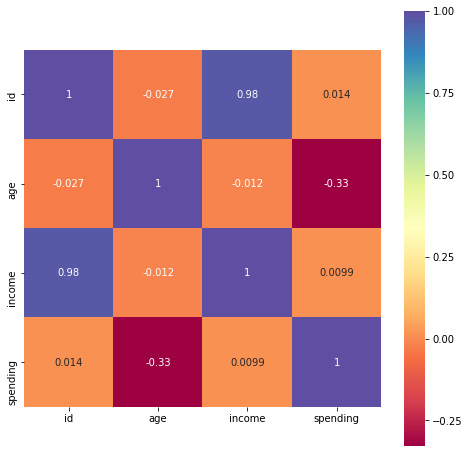

In [23]:
plt.figure(figsize =(8,8))
#ax.set_ylim(4.0, 0)
ax= sns.heatmap(df.corr(),square = True, annot = True,cmap= 'Spectral' )
ax.set_ylim(4.0, 0)

- The Above Graph for Showing the linear correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Blue Color and least correlated features with Red color.We can clearly see that these attributes do not have good correlation among them.

### h. Regression Plot

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
id          200 non-null int64
gender      200 non-null object
age         200 non-null int64
income      200 non-null int64
spending    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


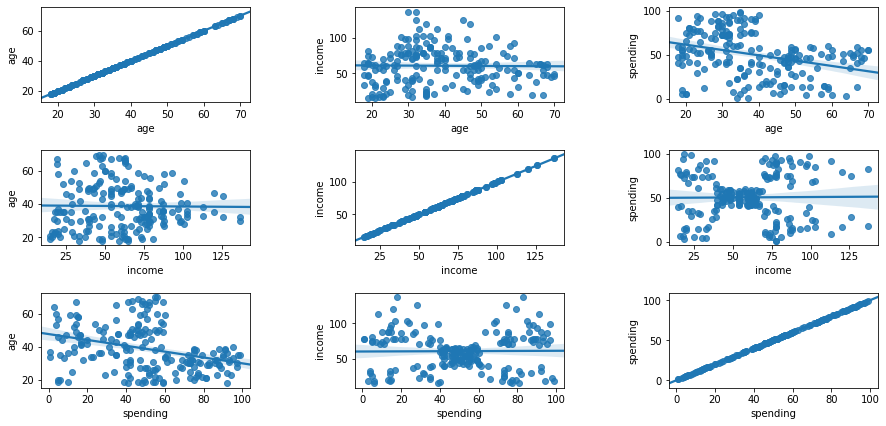

In [25]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['age' , 'income' , 'spending']:
    for y in ['age' , 'income' , 'spending']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### i. Bar Plot

In [26]:
col = sns.color_palette()[0]

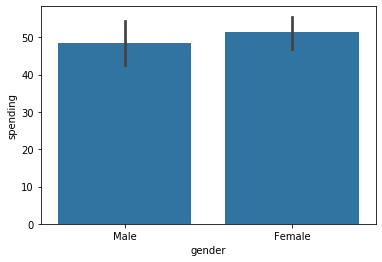

In [27]:
sns.barplot(x="gender", y="spending", data=df, color=col)

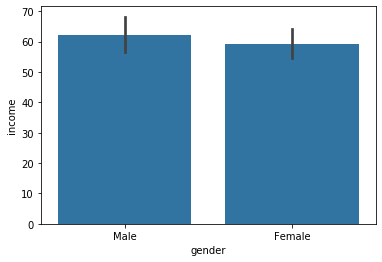

In [28]:
sns.barplot(x="gender", y="income", data=df, color=col)

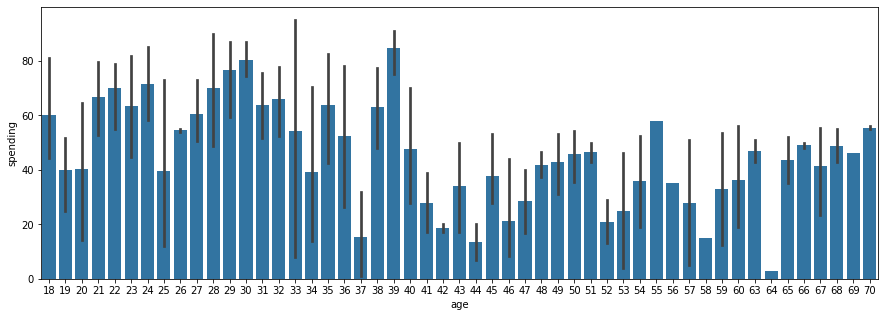

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x="age", y="spending", data=df, color=col)

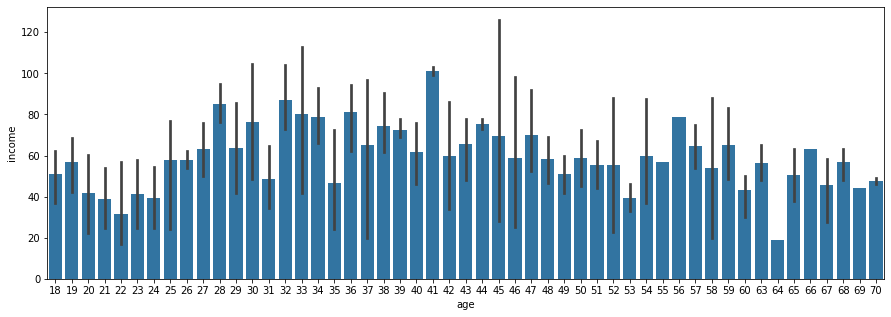

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x="age", y="income", data=df, color=col)

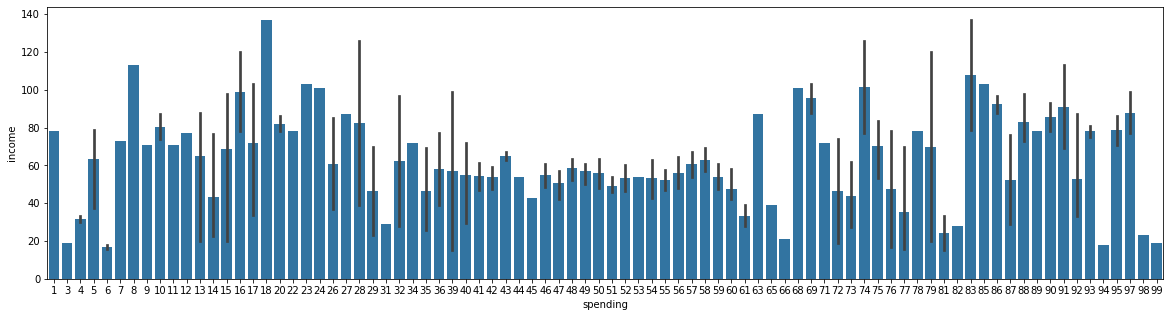

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x="spending", y="income", data=df, color=col)

### j. Pair plot

<Figure size 720x720 with 0 Axes>

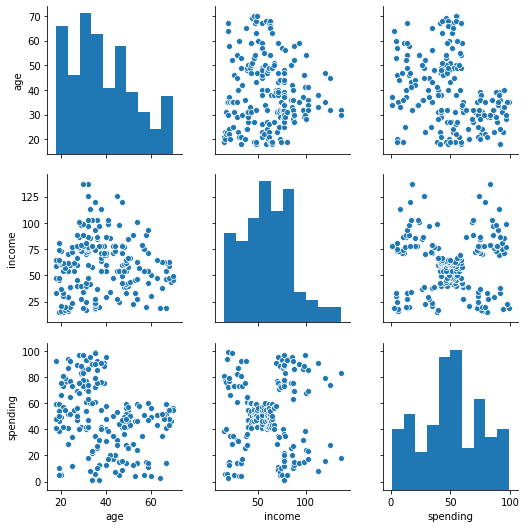

In [32]:
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=["age", "income","spending"])

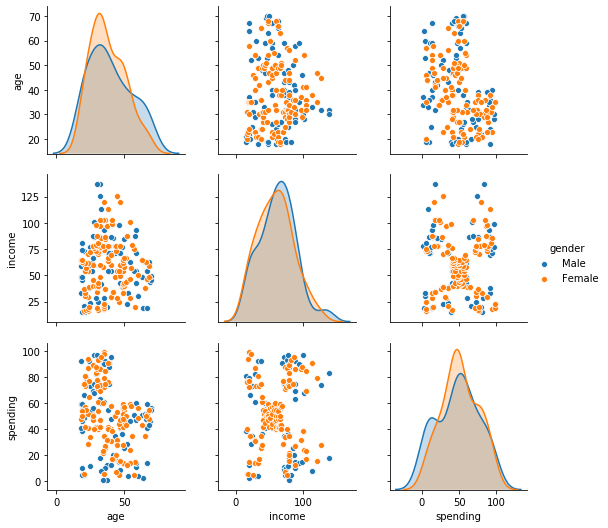

In [33]:
sns.pairplot(df, vars=["age", "income","spending"], hue = "gender")

## 2. Drop all duplicate rows

In [34]:
df.duplicated().sum()

0

## 3. Drop all non-essential features

In [35]:
df.drop(columns=['id'], inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
gender      200 non-null object
age         200 non-null int64
income      200 non-null int64
spending    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## 4. Clean the data with formatting issues if any. (converting datatypes, replacing dollars, etc.)

#### There is no formatting issues.

## 5. Add your view of EDA to enhance understanding of data. i.e., Grouping data and observing the way data is distributed. Try to add as many layers of EDA as possible.

In [37]:
a = df.groupby(['gender', 'age'])
a.first()

income  spending
gender age                  
Female 18       65        48
       19       63        54
       20       16         6
       21       30        73
       22       17        76
...            ...       ...
Male   66       63        48
       67       19        14
       68       63        43
       69       44        46
       70       46        56

[87 rows x 2 columns]

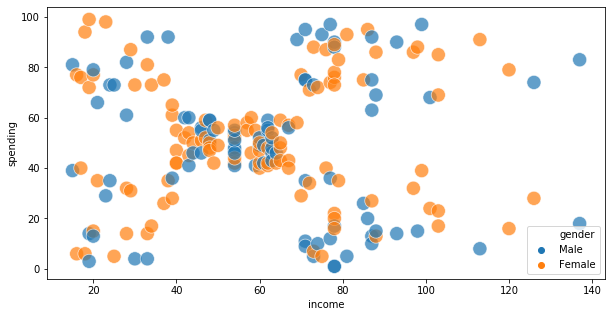

In [38]:
plt.figure(figsize = (10 , 5))
sns.scatterplot(x = 'income',y = 'spending', data = df, hue = 'gender', s=200,alpha =0.7)

## Distribution of Gender in Data

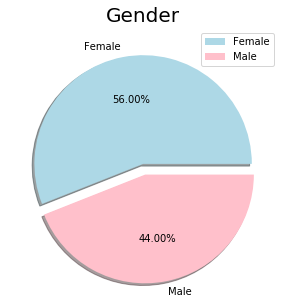

In [39]:
labels = ['Female', 'Male']
size = df['gender'].value_counts()
colors = ['lightblue', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

- This graph explains about the distribution of Gender in the Mall, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

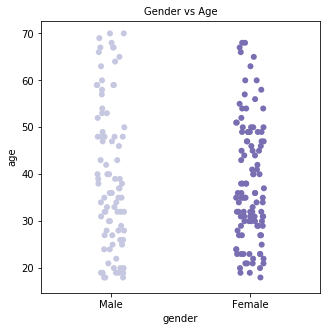

In [40]:
plt.figure(figsize = (5 , 5))
sns.stripplot(df['gender'], df['age'], palette = 'Purples', size = 6)
plt.title('Gender vs Age', fontsize = 10)
plt.show()

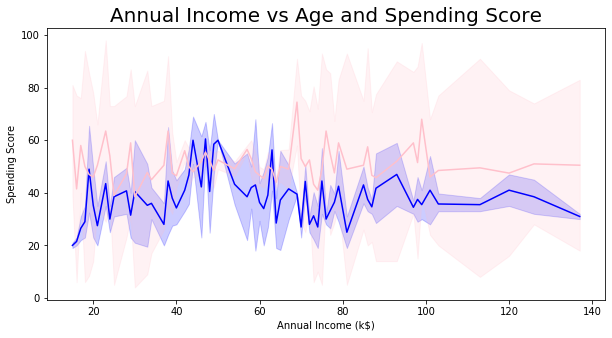

In [41]:
x = df.income
y = df.age
z = df.spending
plt.figure(figsize = (10 , 5))
sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.ylabel('Spending Score');
plt.xlabel('Annual Income (k$)');
plt.show()

 - The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

## 6. Plot an elbow curve to identify what’s the best K – Value.

#### Generating Array of Features

In [42]:
x1 = df.iloc[:, [2, 3]].values
x1.shape

(200, 2)

### Using Elbow method to find the optiminal cluster number

In [43]:
from sklearn.cluster import KMeans
wcss_1 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x1)
    wcss_1.append(km.inertia_)
    

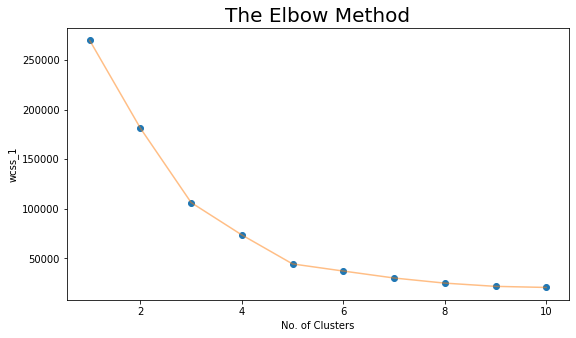

In [44]:
plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_1 , 'o')
plt.plot(np.arange(1 , 11) , wcss_1 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_1')
plt.show()

## 7. Build model – Clustering problem statement, hence build K- Means clustering model.

### Finding the relation between Age and Annual Income

### Applying K means to the Dataset :
- K-means clustering is an unsupervised machine learning algorithm for clustering ‘n’ observations into ‘k’ clusters where k is predefined or user-defined constant.

In [45]:
kmeans_1=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_1=kmeans_1.fit_predict(x1)

In [46]:
labels_1 = kmeans_1.labels_
centroids_1 = kmeans_1.cluster_centers_

In [47]:
labels_1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [48]:
centroids_1

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

### Visualizing the clusters : 2-D Scatter plot

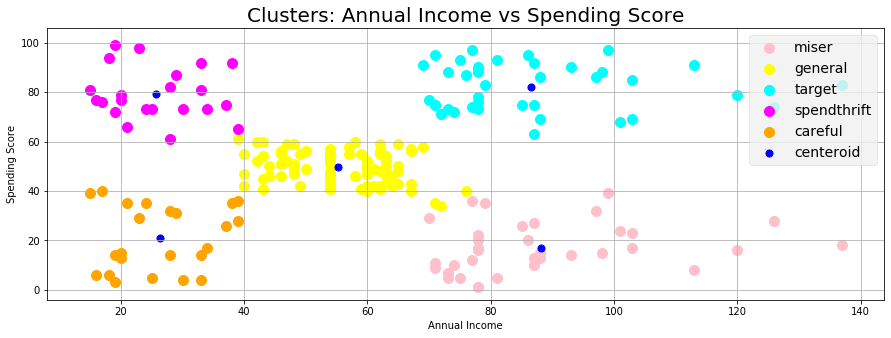

In [49]:
plt.figure(figsize=(15,5))
plt.scatter(x1[y_kmeans_1 == 0, 0], x1[y_kmeans_1 == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x1[y_kmeans_1 == 1, 0], x1[y_kmeans_1 == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x1[y_kmeans_1 == 2, 0], x1[y_kmeans_1 == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x1[y_kmeans_1 == 3, 0], x1[y_kmeans_1 == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x1[y_kmeans_1 == 4, 0], x1[y_kmeans_1 == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(centroids_1[:,0], centroids_1[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Clusters: Annual Income vs Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

- Cluster 1- High income low spending = Miser

- Cluster 2- Medium income medium spending = General

- Cluster 3- High Income and high spending =Target

- Cluster 4- Low Income and high spending = Spendthrift

- Cluster 5- Low Income and low spending = Careful

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## 8. Build models with every variable against each other to understand the grouping.

### Finding the relation between Age and spending score

#### Generating Array of Features

In [50]:
x2 = df.iloc[:, [1,3]].values
x2.shape

(200, 2)

### Using Elbow method to find the optiminal cluster number

In [51]:
wcss_2 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss_2.append(km.inertia_)

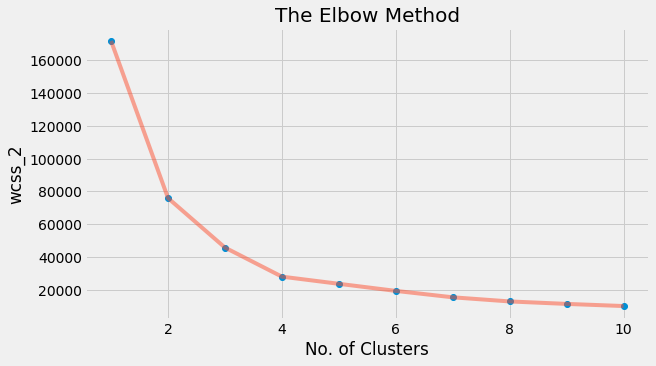

In [52]:
plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_2 , 'o')
plt.plot(np.arange(1 , 11) , wcss_2 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_2')
plt.show()

### Applying K means to the Dataset

In [53]:
kmeans_2=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_2=kmeans_2.fit_predict(x2)

In [54]:
y_kmeans_2

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [55]:
labels_2= kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

### Visualizing the clusters : : 2-D Scatter plot

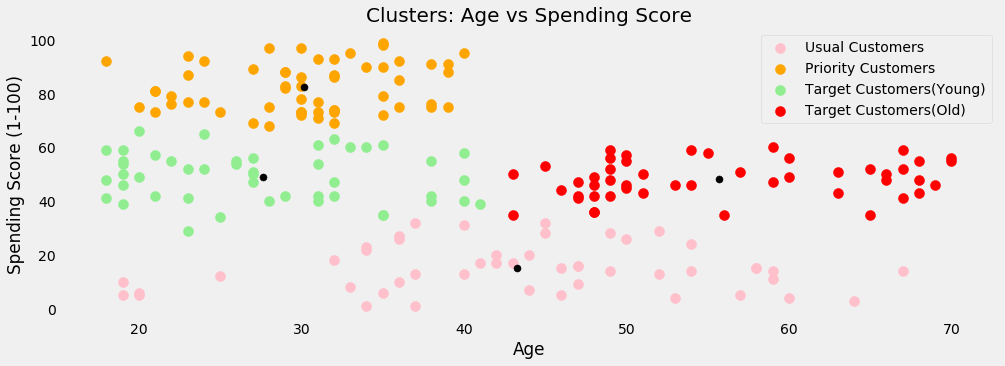

In [56]:
plt.figure(figsize=(15,5))
plt.title('Clusters: Age vs Spending Score', fontsize = 20)

plt.scatter(x2[y_kmeans_2 == 0, 0], x2[y_kmeans_2 == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x2[y_kmeans_2 == 1, 0], x2[y_kmeans_2 == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x2[y_kmeans_2 == 2, 0], x2[y_kmeans_2 == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x2[y_kmeans_2 == 3, 0], x2[y_kmeans_2 == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(centroids_2[:, 0],centroids_2[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

> We can clearly see that Only young people (18-40 age group) are involved in High Spending. As age increases people fall into average or Low spending category

> I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

### Finding the relation between Age and Annual Income

#### Generating Array of Features

In [57]:
x3 = df.iloc[:, [1,2]].values
x3.shape

(200, 2)

In [58]:
wcss_3 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x3)
    wcss_3.append(km.inertia_)

### Using Elbow method to find the optiminal cluster number

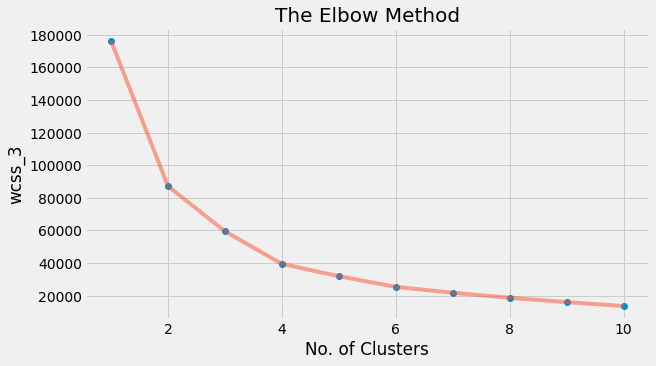

In [59]:
plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_3 , 'o')
plt.plot(np.arange(1 , 11) , wcss_3 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_3')
plt.show()

### Applying K means to the Dataset

In [60]:
kmeans_3=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans_3=kmeans_3.fit_predict(x3)

In [61]:
labels_3 = kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

### Visualizing the clusters :  2-D Scatter plot

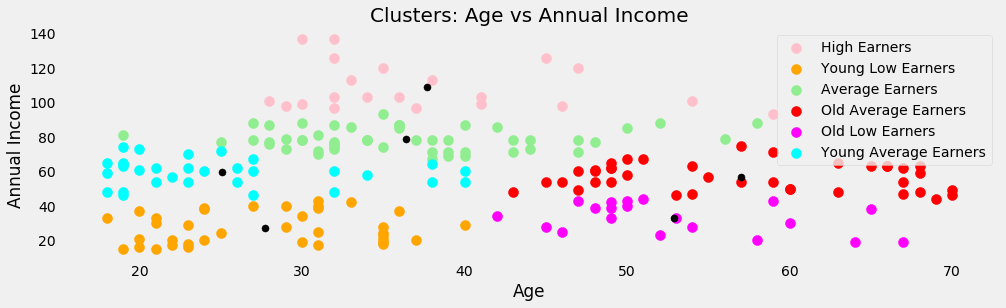

In [62]:
plt.figure(figsize=(15,4))
plt.title('Clusters: Age vs Annual Income', fontsize = 20)

plt.scatter(x3[y_kmeans_3 == 0, 0], x3[y_kmeans_3 == 0, 1], s = 100, c = 'pink', label = 'High Earners' )
plt.scatter(x3[y_kmeans_3 == 1, 0], x3[y_kmeans_3 == 1, 1], s = 100, c = 'orange', label = 'Young Low Earners')
plt.scatter(x3[y_kmeans_3 == 2, 0], x3[y_kmeans_3 == 2, 1], s = 100, c = 'lightgreen', label = 'Average Earners')
plt.scatter(x3[y_kmeans_3 == 3, 0], x3[y_kmeans_3 == 3, 1], s = 100, c = 'red', label = 'Old Average Earners')
plt.scatter(x3[y_kmeans_3 == 4, 0], x3[y_kmeans_3 == 4, 1], s = 100, c = 'magenta', label = 'Old Low Earners')
plt.scatter(x3[y_kmeans_3 == 5, 0], x3[y_kmeans_3 == 5, 1], s = 100, c = 'cyan', label = 'Young Average Earners')

plt.scatter(centroids_3[:, 0],centroids_3[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.grid()
plt.show()

> We can see people in age group of 30-40 people have high Annual income

> I have divided them into 6 different categories namely High Earners, Young Low Earners, Average Earners,Senior Citizen average Earners, Senior Citizen low Earners, Young average Earners. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

## 9. Grouping and extracting the grouped output as a .csv file.

In [63]:
df_1 = df[['income','spending']]
df_1['Clusters'] = pd.DataFrame(labels_1)
df_1.head()

,income,spending,Clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [64]:
df_2 = df[['age','spending']]
df_2['Clusters'] = pd.DataFrame(labels_2)
df_2.head()

,age,spending,Clusters
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


In [65]:
df_3 = df[['age','income']]
df_3['Clusters'] = pd.DataFrame(labels_3)
df_3.head()

,age,income,Clusters
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1


In [66]:
#to csv
df_1.to_csv("Income_and_spendings.csv", index=False)
df_2.to_csv("age_and_spendings.csv", index=False)
df_3.to_csv("age_and_income.csv",index=False)

## Benefits of customer segmentation


- By enabling companies to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities.


- When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs, it's easier for companies to send those customers special offers meant to encourage them to buy more products. Customer segmentation can also improve customer service and assist in customer loyalty and retention.


- As a by-product of its personalized nature, marketing materials sent out using customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship.


- Other benefits of customer segmentation include staying a step ahead of competitors in specific sections of the market and identifying new products that existing or potential customers could be interested in or improving products to meet customer expectations.